## Language detection 
#### Text to the language its written 


In [34]:
import pandas as pd
import numpy as np

In [35]:
df= pd.read_csv("Language Detection.csv")
df.head()

,Text,Language
0,"Nature, in the broadest sense, is the natural...",English
1,"""Nature"" can refer to the phenomena of the phy...",English
2,"The study of nature is a large, if not the onl...",English
3,"Although humans are part of nature, human acti...",English
4,[1] The word nature is borrowed from the Old F...,English


In [36]:
df.shape

(10337, 2)

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10337 entries, 0 to 10336
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Text      10337 non-null  object
 1   Language  10337 non-null  object
dtypes: object(2)
memory usage: 161.6+ KB


In [38]:
df[df.duplicated()]

,Text,Language
1141,i'm sorry.,English
1180,oh my god.,English
1196,i'm sorry.,English
1724,എന്നോട് ക്ഷമിക്കൂ.,Malayalam
1767,ഓ എന്റെ ദൈവമേ.,Malayalam
...,...,...
9706,Ach du lieber Gott.,German
9726,Es tut mir Leid.,German
10081,ನನ್ನನ್ನು ಕ್ಷಮಿಸು.,Kannada
10125,ಓ ದೇವರೇ.,Kannada


In [39]:
df.drop(df[df.duplicated()].index, axis=0, inplace=True)

In [40]:
df["Language"].nunique()

17

In [41]:
df["Language"].value_counts()

Language
English       1382
French        1007
Spanish        816
Portugeese     736
Italian        694
Russian        688
Sweedish       673
Malayalam      591
Dutch          542
Arabic         532
Turkish        471
German         465
Tamil          464
Danish         424
Kannada        366
Greek          358
Hindi           62
Name: count, dtype: int64

In [42]:
import re
def clean_function(Text):
    # removing the symbols and numbers
    Text = re.sub(r'[\([{})\]!@#$,"%^*?:;~`0-9]', ' ', Text)
    
    # converting the text to lower case
    Text = Text.lower()
    Text = re.sub('http\S+\s*', ' ', Text)  # remove URLs
    Text = re.sub('RT|cc', ' ', Text)  # remove RT and cc
    Text = re.sub('#\S+', '', Text)  # remove hashtags
    Text = re.sub('@\S+', '  ', Text)  # remove mentions
    Text = re.sub('\s+', ' ', Text)  # remove extra whitespace
    
    return Text

In [43]:
df['Cleaned_Text'] = df['Text'].apply(lambda x: clean_function(x))
df.head()

,Text,Language,Cleaned_Text
0,"Nature, in the broadest sense, is the natural...",English,nature in the broadest sense is the natural p...
1,"""Nature"" can refer to the phenomena of the phy...",English,nature can refer to the phenomena of the phys...
2,"The study of nature is a large, if not the onl...",English,the study of nature is a large if not the only...
3,"Although humans are part of nature, human acti...",English,although humans are part of nature human activ...
4,[1] The word nature is borrowed from the Old F...,English,the word nature is borrowed from the old fren...


In [44]:
X= df["Cleaned_Text"]
y= df["Language"]

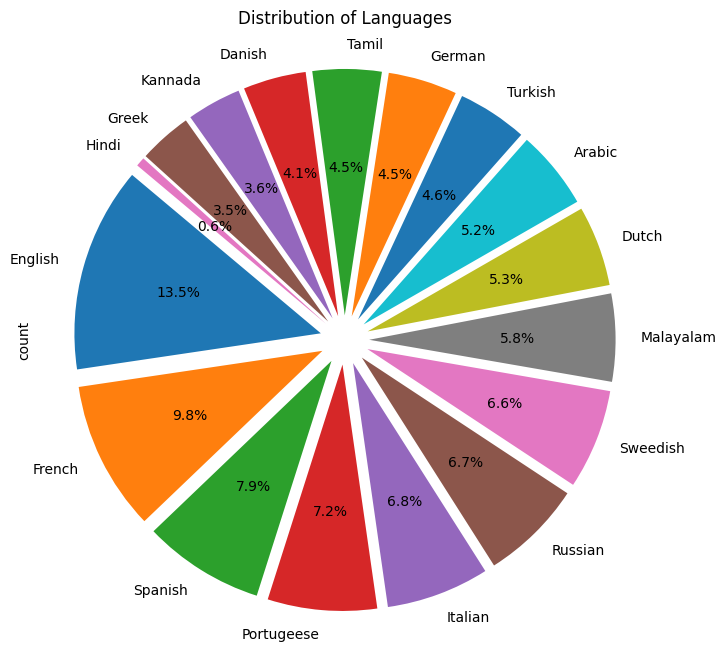

In [45]:

import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(8, 8))
df['Language'].value_counts().loc[df['Language'].value_counts().index].plot.pie(autopct='%1.1f%%', startangle=140, explode=[0.1] * len(df['Language'].unique()))
plt.title('Distribution of Languages')
plt.show()

In [46]:
def Visualization(sentence): 
    nlp = spacy.load('en_core_web_sm')
    doc=nlp(sentence)
    displacy.render(doc, style='dep', jupyter=True, options={'distance': 80})
    displacy.render(doc, style='ent', jupyter=True)
    

In [47]:
from sklearn.preprocessing import LabelEncoder
encoder= LabelEncoder()
y= encoder.fit_transform(y)

In [48]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X, y,test_size=0.2, random_state=42)

In [49]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

In [50]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB

In [51]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [52]:
doc=[  "LANGUAGE DETECTION MODEL CHECK", 
        "VERIFICACIÓN DEL MODELO DE DETECCIÓN DE IDIOMAS", 
        "توففحص نموذج الكشف عن اللغة",
        "ತಪ್ಪು ಏನು ಬಂದಿದೆಯೆಂದರೆ ಆ ದಿನದಿಂದ ನಿಮಗೆ",
        "Привет, это тест",
        "we are boys",
        "انا مصري ",
        "mon petit.",
        "Hola amigo"
    ]

In [53]:
def predict(text):
    lang = model.predict(tfidf_vectorizer.transform([text]))
    language = encoder.inverse_transform(lang)[0]
    print('The Language is in', language)

In [54]:
def model_plt(conf_matrix, ):
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='coolwarm')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

In [55]:
model= LogisticRegression()
model.fit(X_train_tfidf, y_train)
y_pred = model.predict(X_test_tfidf)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
# classification_report_str = classification_report(y_test, y_pred)

Accuracy: 0.9557177615571776


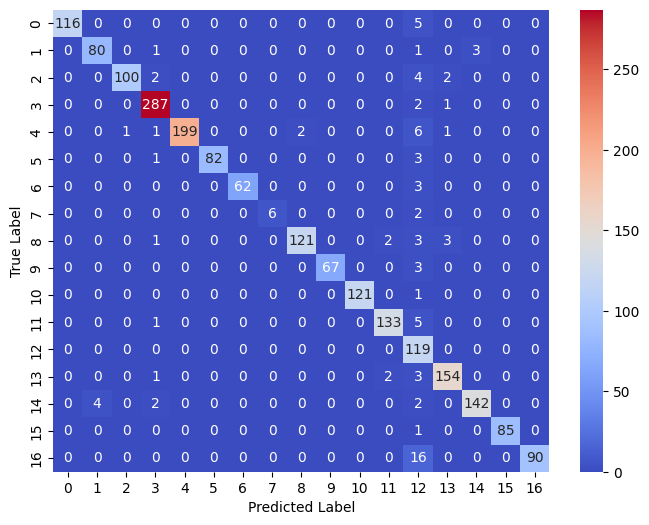

In [56]:

print(f'Accuracy: {accuracy}')
# print(f'Classification Report:\n{classification_report_str}')
model_plt(conf_matrix)

In [57]:
for text in doc:
    predict(text)

The Language is in English
The Language is in Spanish
The Language is in Arabic
The Language is in Kannada
The Language is in Russian
The Language is in English
The Language is in Russian
The Language is in French
The Language is in Russian


Accuracy: 0.4004866180048662


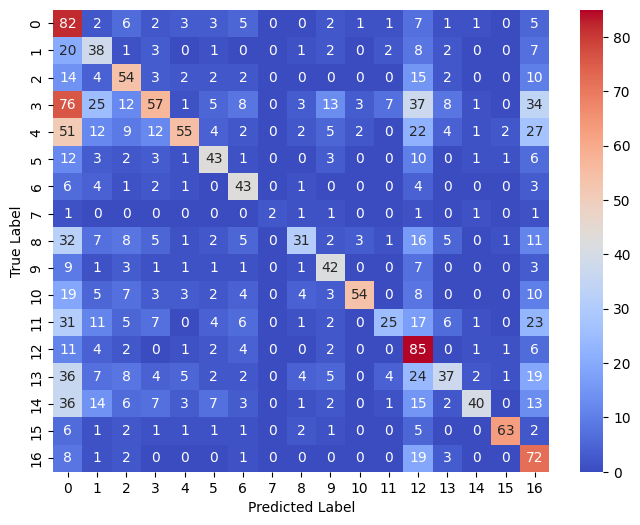

In [58]:
model= KNeighborsClassifier()
model.fit(X_train_tfidf, y_train)
y_pred = model.predict(X_test_tfidf)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
# classification_report_str = classification_report(y_test, y_pred)


print(f'Accuracy: {accuracy}')
# print(f'Classification Report:\n{classification_report_str}')
model_plt(conf_matrix)


In [59]:
for text in doc:
    predict(text)

The Language is in English
The Language is in French
The Language is in German
The Language is in Kannada
The Language is in Russian
The Language is in Dutch
The Language is in Russian
The Language is in French
The Language is in Russian


Accuracy: 0.9445255474452555


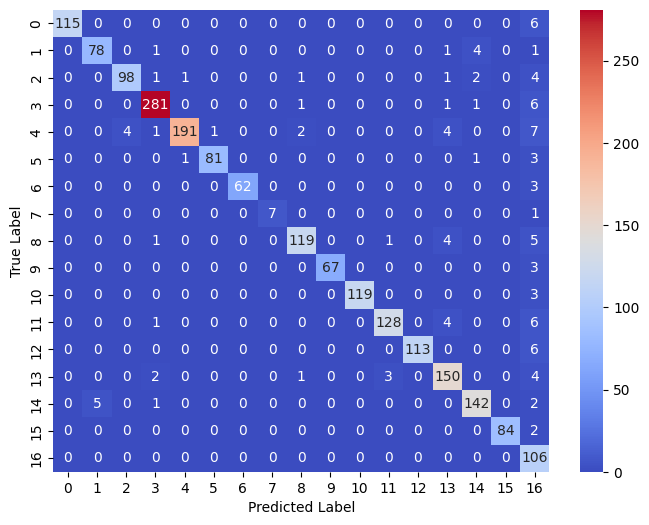

In [60]:
model= RandomForestClassifier()
model.fit(X_train_tfidf, y_train)
y_pred = model.predict(X_test_tfidf)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_report_str = classification_report(y_test, y_pred)


print(f'Accuracy: {accuracy}')
# print(f'Classification Report:\n{classification_report_str}')
model_plt(conf_matrix)


In [61]:
for text in doc:
    predict(text)

The Language is in Turkish
The Language is in Spanish
The Language is in Arabic
The Language is in Kannada
The Language is in Russian
The Language is in English
The Language is in Turkish
The Language is in French
The Language is in Turkish


Accuracy: 0.9600973236009732
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.96      0.98       121
           1       0.99      0.94      0.96        85
           2       1.00      0.94      0.97       108
           3       0.81      1.00      0.90       290
           4       0.99      0.98      0.98       210
           5       1.00      0.98      0.99        86
           6       1.00      0.95      0.98        65
           7       1.00      0.62      0.77         8
           8       1.00      0.95      0.97       130
           9       1.00      0.96      0.98        70
          10       1.00      0.99      1.00       122
          11       0.98      0.96      0.97       139
          12       1.00      0.96      0.98       119
          13       0.97      0.96      0.97       160
          14       0.97      0.97      0.97       150
          15       1.00      0.99      0.99        86
          16       1.00      

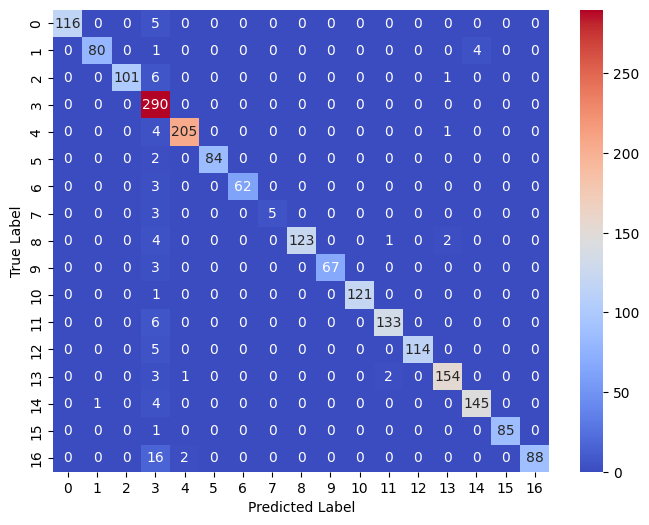

In [62]:
model= MultinomialNB()
model.fit(X_train_tfidf, y_train)
y_pred = model.predict(X_test_tfidf)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_report_str = classification_report(y_test, y_pred)


print(f'Accuracy: {accuracy}')
print(f'Classification Report:\n{classification_report_str}')
model_plt(conf_matrix)


In [63]:
for text in doc:
    predict(text)

The Language is in English
The Language is in Spanish
The Language is in Arabic
The Language is in Kannada
The Language is in Russian
The Language is in English
The Language is in English
The Language is in French
The Language is in Spanish


In [64]:
predict("hola amigos")

The Language is in Spanish


In [65]:
predict('namaste')

The Language is in English


In [66]:
predict('amour plastique')

The Language is in English
